# Usage of py_simple_report

This library is intended to be developed for creating elements of a report.  
Why element? We want to have titles, legends, labels. However, if you try to obtain all of them, simultaneously, it's a increadible task, and requires a higher graphical knowledge. Then, I take an alternative strategy. Generate elements of a figure.  
These compositions can be merged manually in some graphical tools (Ex. powerpoint).

## Currently py_simple_report supports
- Crosstabulation with stratification
    - Barplot
    - Stacked barplot
- Crosstabulation for multiple binaries with stratification
    - Barplot

## Dataset 
py_simple_report assumes that you have two kind of dataset, original data and variable table.    
Variable table should include at least 3 columns, a variable name, a description of a variable, and a corresponding numbers and strings for each item. 

Here, we use Rdataset, "plantTraits" in the statsmodels. Docs of this dataset can be accessed from [here](https://vincentarelbundock.github.io/Rdatasets/doc/cluster/plantTraits.html).

In [1]:
import tqdm
import numpy as np
import pandas as pd
import statsmodels.api as sm
import py_simple_report as sim_repo

In [2]:
sim_repo.__version__

'0.2.2'

In [3]:
df = sm.datasets.get_rdataset("plantTraits", "cluster").data.reset_index()
n = df.shape[0]
print(df.shape)
# Add missing 
np.random.seed(1234)
rnd1 = np.random.randint(n, size=6)
cols = ["mycor", "vegsout"]
df.loc[rnd1, cols] = np.nan

(136, 32)


Since we do not have variable table for this dataset, just create. See, items are comma separated and connected via "=" (equal).

In [4]:
df_var = pd.DataFrame({
    "var_name": ["mycor", "height", "vegsout", "autopoll", "piq", "ros", "semiros"],
    "description" : ["Mycorrhizas", 
                     "Plan height", 
                     "underground vegetative propagation",
                     "selfing pollination",
                     "thorny",
                     "rosette",
                     "semiros"
                    ],
    "items" : ["0=never,1=sometimes,2=always", 
               np.nan,
               "0=never,1=present but limited,2=important",
               "0=never,1=rare,2=often,3=rule",
               "0=non-thorny,1=thorny",
               "0=non-rosette,1=rosette",
               "0=non-semiros,1=semiros",
              ],
})

In [5]:
df_var.head()

,var_name,description,items
0,mycor,Mycorrhizas,"0=never,1=sometimes,2=always"
1,height,Plan height,NaN
2,vegsout,underground vegetative propagation,"0=never,1=present but limited,2=important"
3,autopoll,selfing pollination,"0=never,1=rare,2=often,3=rule"
4,piq,thorny,"0=non-thorny,1=thorny"


## QuestionDataContainer
Question data container is a caontainer easy to be accessed by other functions.  
You can create from scratch, or create from a varaible table.

In [6]:
# Manually
qdc = sim_repo.QuestionDataContainer(
    var_name="mycor", 
    desc="Mycorrhizas",
    title="Mycor",
    missing="missing", # name of missing
    order = ["never", "sometimes", "always"] # used for ordering indexes or columns
) 

In [7]:
qdc.show() # can access information of QuestionDataContainer

self : qdc_Mycor
var_name : mycor
missing : missing
desc : Mycorrhizas
title : Mycor
dic : None
order : ['never', 'sometimes', 'always']


In [8]:
# From a variable table. 
col_var_name = "var_name"
col_item = "items"
col_desc = "description"
qdcs_dic = sim_repo.question_data_containers_from_dataframe(
    df_var, col_var_name, col_item, col_desc, missing="missing")

In [9]:
print(qdcs_dic.keys())

dict_keys(['mycor', 'vegsout', 'autopoll', 'piq', 'ros', 'semiros'])


In [10]:
qdc = qdcs_dic["mycor"]
qdc.show()

self : qdc_mycor_Mycorrhizas
var_name : mycor
missing : missing
desc : Mycorrhizas
title : mycor_Mycorrhizas
dic : OrderedDict([(0.0, 'never'), (1.0, 'sometimes'), (2.0, 'always'), (nan, 'missing')])
order : odict_values(['never', 'sometimes', 'always', 'missing'])


## Visualization
Giving two question data container to function producese a graph.
From now on, data is always stratified by "autopoll", the variable name of qdc for "autopoll" is set to be "qdc_strf"

In [11]:
qdc1 = qdcs_dic["vegsout"]
qdc_strf = qdcs_dic["autopoll"]
qdc_strf.order = ['never', 'rare', 'often', 'rule'] # not to show "missing"

In [12]:
qdc_strf.show()

self : qdc_autopoll_selfing pollination
var_name : autopoll
missing : missing
desc : selfing pollination
title : autopoll_selfing pollination
dic : OrderedDict([(0.0, 'never'), (1.0, 'rare'), (2.0, 'often'), (3.0, 'rule'), (nan, 'missing')])
order : odict_values(['never', 'rare', 'often', 'rule', 'missing'])


vegsout,never,present but limited,important,missing
autopoll,,,,
never,47,13,8,5
rare,13,3,8,2
often,11,3,2,0
rule,20,0,0,1


vegsout,never,present but limited,important,missing
autopoll,,,,
never,64.383562,17.808219,10.958904,6.849315
rare,50.000000,11.538462,30.769231,7.692308
often,68.750000,18.750000,12.500000,0.000000
rule,95.238095,0.000000,0.000000,4.761905


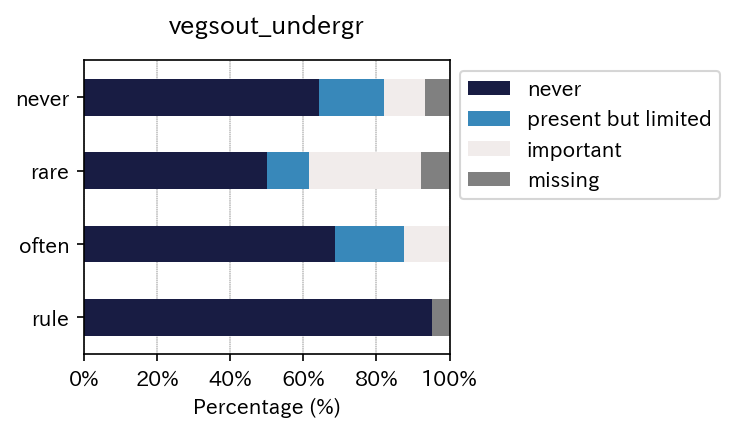

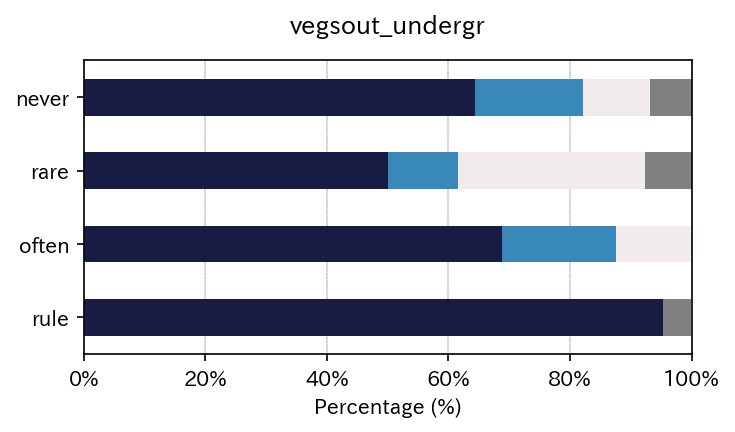

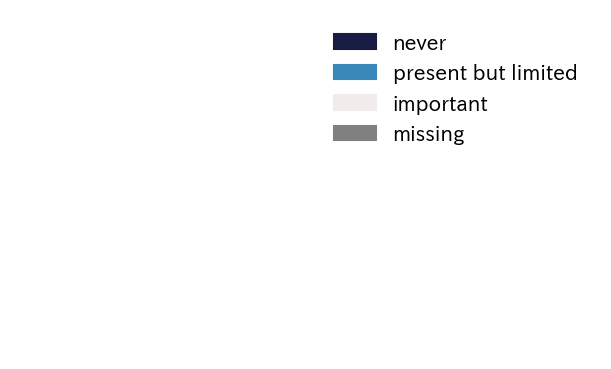

In [13]:
sim_repo.output_crosstab_cate_barplot(
    df,
    qdc1, 
    qdc_strf)

#### Got it!!
You now see, two tables of cross tabulated data, and three elements of figures. 
- a simple figure with legend (this can be ugly when label names are too long)
- a figure witout legend
- only a legend

## With parameters available. 
Save functions are available. It saves number vertically, and figures with "\_only\_label" and "\_no\_label".   
Also, several parameters to control outputs exist.

In [14]:
!mkdir test

mkdir: cannot create directory ‘test’: File exists


In [15]:
dir2save = "./test"

vegsout,never,present but limited,important
autopoll,,,
never,47,13,8
rare,13,3,8
often,11,3,2
rule,20,0,0


vegsout,never,present but limited,important
autopoll,,,
never,69.117647,19.117647,11.764706
rare,54.166667,12.500000,33.333333
often,68.750000,18.750000,12.500000
rule,100.000000,0.000000,0.000000


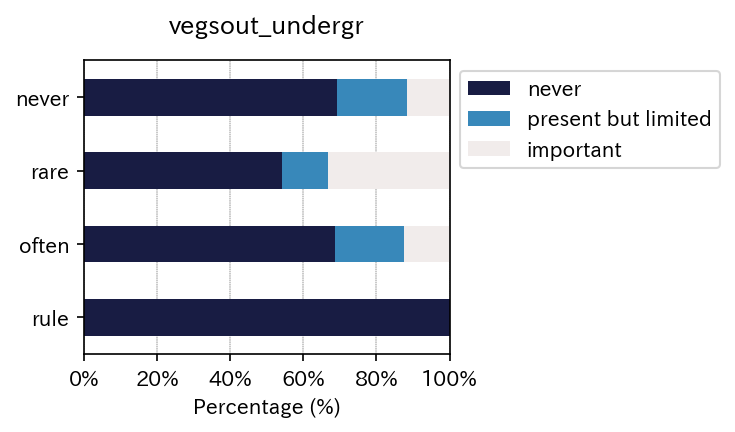

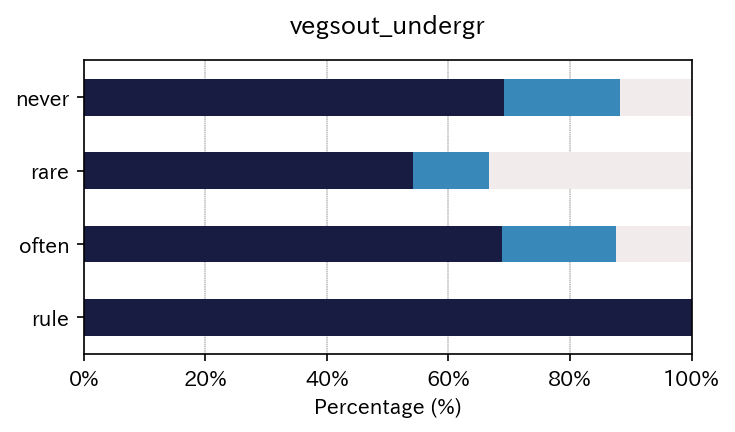

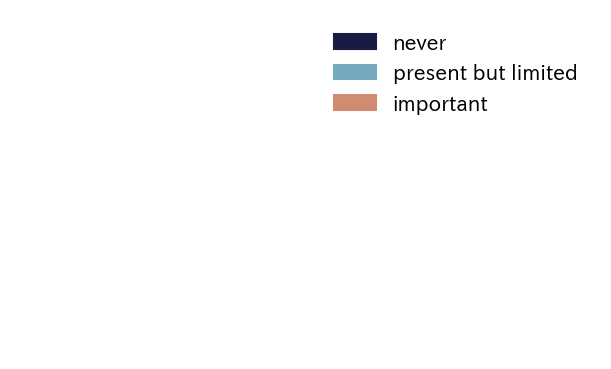

In [16]:
sim_repo.output_crosstab_cate_barplot(
    df,
    qdc1, 
    qdc_strf,
    skip_miss=True, 
    save_fig_path = dir2save + "/vegsout_undergr.png",
    save_num_path = dir2save + "/number.csv",
    decimal = 4
)

Just using for loops enables to output multiple results.

In [17]:
lis = ['mycor', 'vegsout', 'piq', 'ros', 'semiros']
for var_name in tqdm.tqdm(lis):
    sim_repo.output_crosstab_cate_barplot(
        df,
        qdcs_dic[var_name], 
        qdc_strf,
        skip_miss=False, 
        save_fig_path = dir2save + f"/{var_name}.png",
        save_num_path = dir2save + "number.csv", # save the number to the same file.
        show=False,
    )

100%|██████████| 5/5 [00:02<00:00,  1.87it/s]


##  Barplot
Simple barplot version

vegsout,never,present but limited,important,missing
autopoll,,,,
never,47,13,8,5
rare,13,3,8,2
often,11,3,2,0
rule,20,0,0,1


vegsout,never,present but limited,important,missing
autopoll,,,,
never,47,13,8,5
rare,13,3,8,2
often,11,3,2,0
rule,20,0,0,1


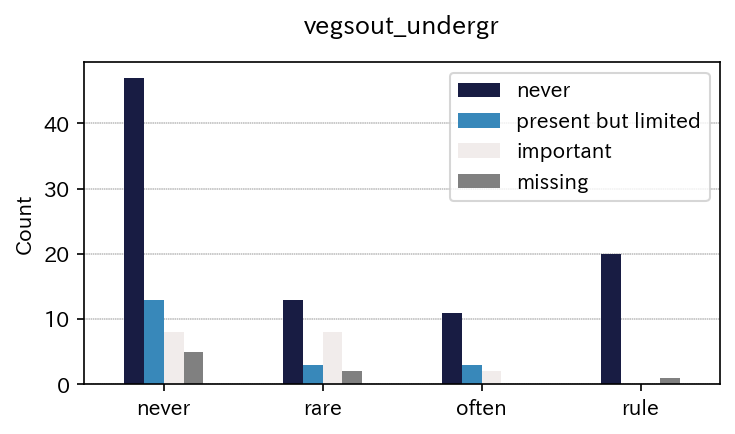

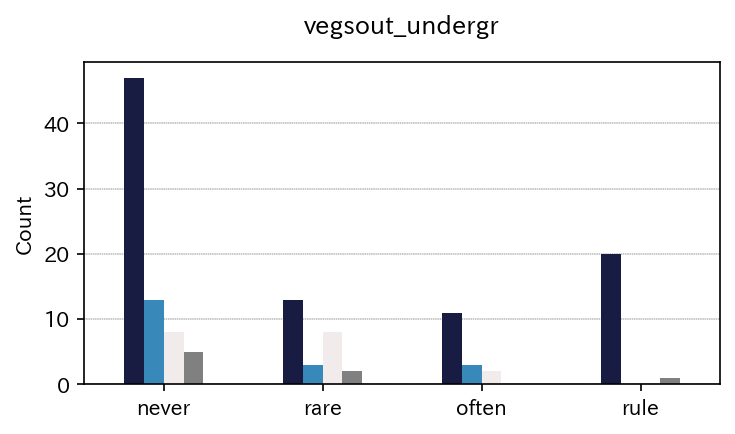

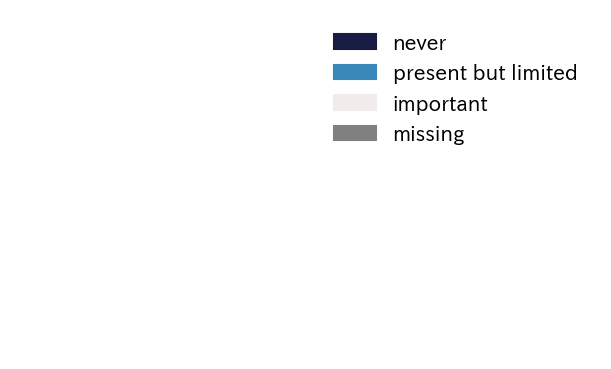

In [18]:
sim_repo.output_crosstab_cate_barplot(
    df,qdc_strf, qdc1,  percentage=False, skip_miss=False, stacked=False,  transpose=True
)

###  Multiple binaries with stratification
Multiple binaries can be summarized in a single figure.  

,thorny,rosette,semiros
never,9,8,17
rare,5,1,7
often,0,2,2
rule,3,1,9


,thorny,rosette,semiros
never,12.328767,10.958904,23.287671
rare,19.230769,3.846154,26.923077
often,0.000000,12.500000,12.500000
rule,14.285714,4.761905,42.857143


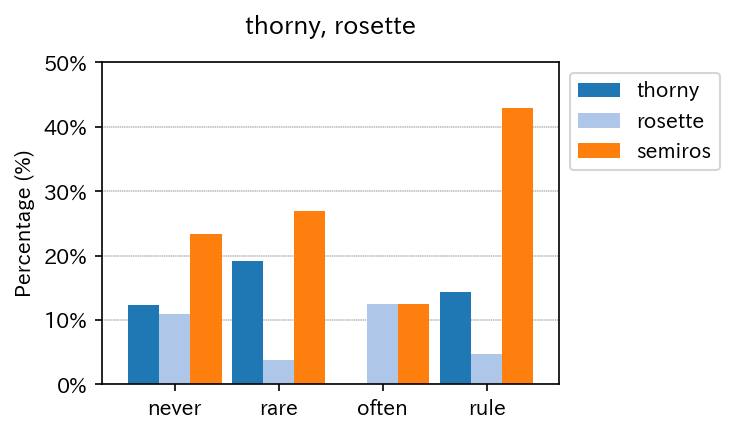

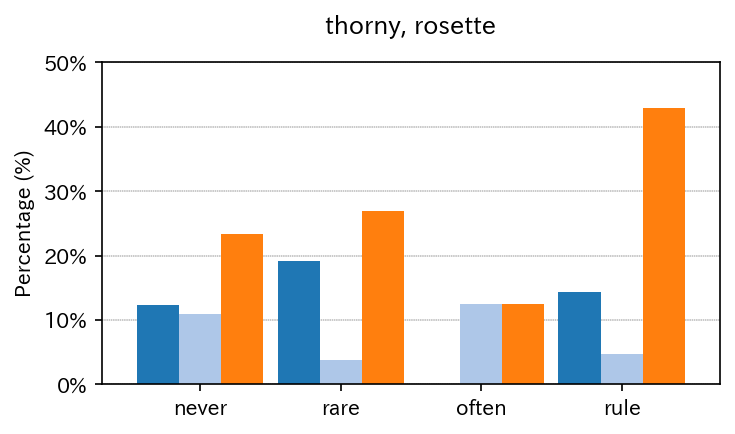

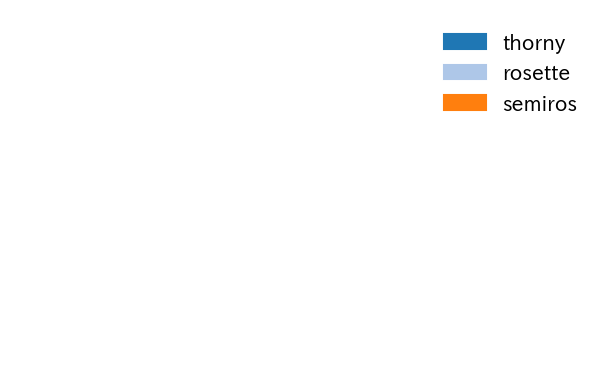

In [19]:
lis = ["piq", "ros", "semiros"]  # variable names
vis_var = sim_repo.VisVariables(ylim=[0,50], cmap_name="tab20", cmap_type="matplotlib")
sim_repo.output_multi_binaries_with_strat(df, lis, qdcs_dic, qdc_strf, vis_var)

## VisVariables
Important classes in py_simple_report is a VisVariables. It controls a figure setting via it values. 

vegsout,never,present but limited,important,missing
autopoll,,,,
never,47,13,8,5
rare,13,3,8,2
often,11,3,2,0
rule,20,0,0,1


vegsout,never,present but limited,important,missing
autopoll,,,,
never,64.383562,17.808219,10.958904,6.849315
rare,50.000000,11.538462,30.769231,7.692308
often,68.750000,18.750000,12.500000,0.000000
rule,95.238095,0.000000,0.000000,4.761905


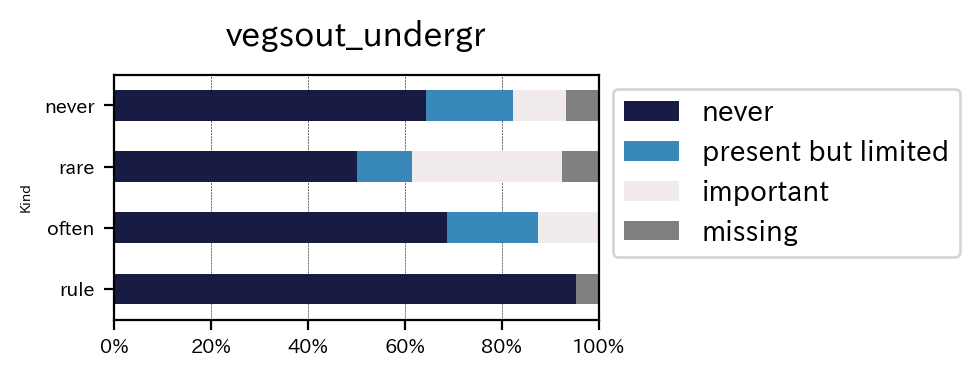

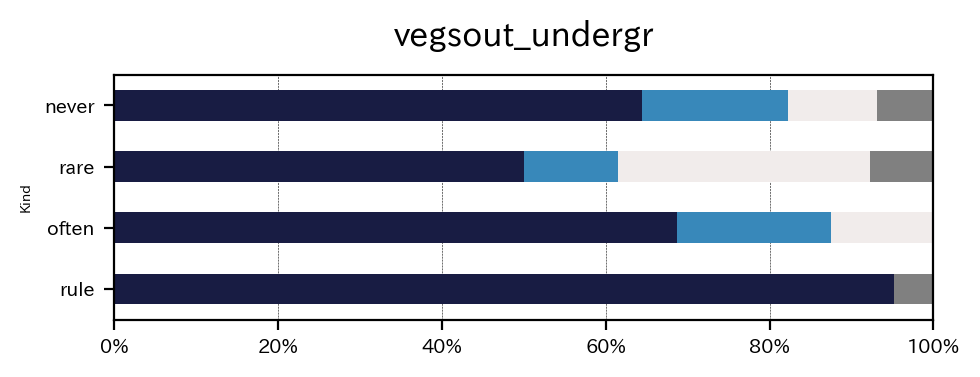

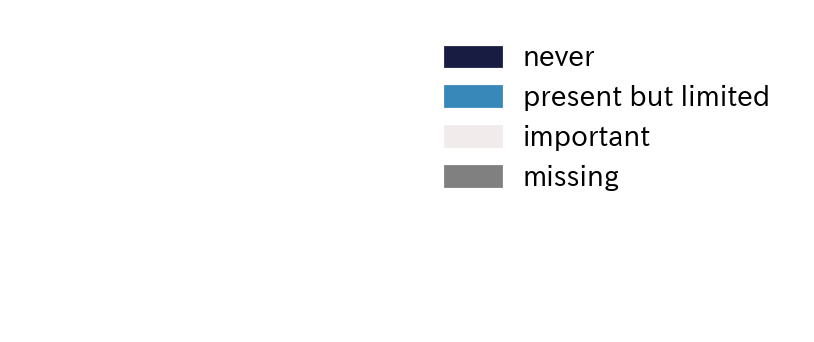

In [20]:
vis_var = sim_repo.VisVariables(
    figsize=(5,2),
    dpi=200,
    xlabel="",
    ylabel="Kind",
    ylabelsize=5,
    yticksize=7,
    xticksize=7,
)
sim_repo.output_crosstab_cate_barplot(
    df,
    qdc1, 
    qdc_strf,
    vis_var = vis_var,
    save_fig_path = dir2save + "/vegsout_undergr_vis_var.png",
    save_num_path = dir2save + "number.csv",
)

## Engineered columns
Of course, engineered columns can be used.

3~5    69
<3     37
>5     30
Name: height_cate, dtype: int64


height_cate,<3,3~5,>5
autopoll,,,
never,18,34,21
rare,7,12,7
often,5,9,2
rule,7,14,0


height_cate,<3,3~5,>5
autopoll,,,
never,24.657534,46.575342,28.767123
rare,26.923077,46.153846,26.923077
often,31.250000,56.250000,12.500000
rule,33.333333,66.666667,0.000000


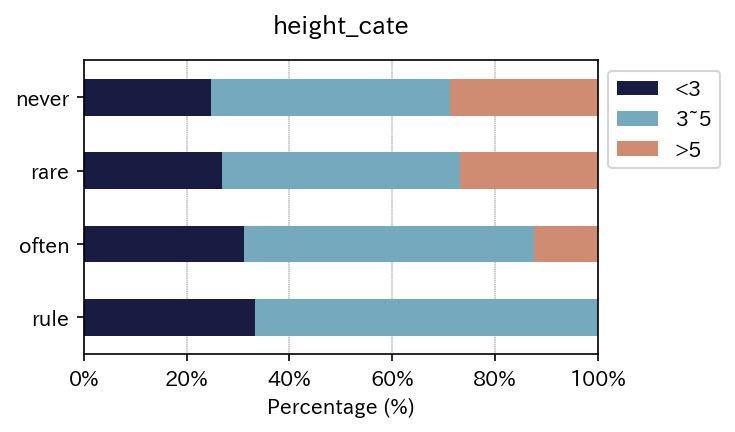

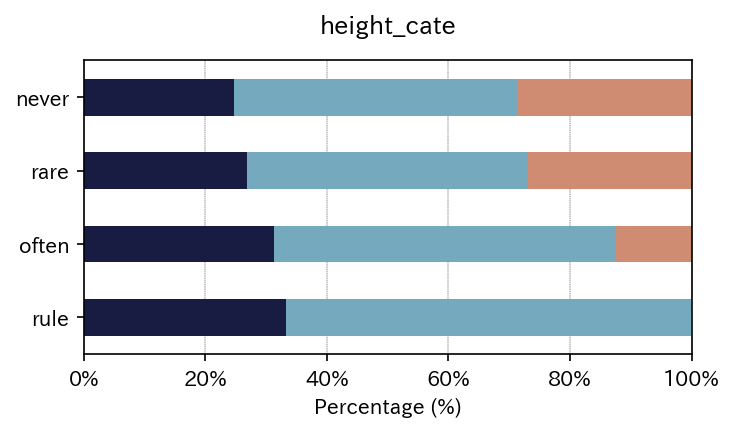

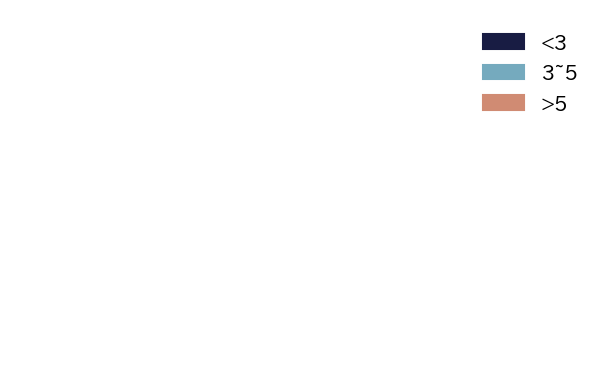

In [21]:
height_cate = "height_cate"
ser = df["height"]
df[height_cate] = (ser
                   .mask( ser <= 9, ">5")
                   .mask( ser <= 5, "3~5")
                   .mask( ser < 3 , "<3")
                  )
print(df[height_cate].value_counts())
qdc = sim_repo.QuestionDataContainer(
    var_name=height_cate, order=["<3","3~5",">5"], missing="missing", title=height_cate
)

vis_var = sim_repo.VisVariables()
sim_repo.output_crosstab_cate_barplot(
    df, 
    qdc=qdc, 
    qdc_strf=qdc_strf, 
    show=True, 
    vis_var=vis_var,
)